# Dominant Color Tutorial
*Reference*:
- https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook?rq=1
- https://matplotlib.org/examples/color/named_colors.html
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html

In [1]:
import cv2
import numpy as np
from skimage import io

img = io.imread('https://i.stack.imgur.com/DNM65.png')[:, :, :-1]

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

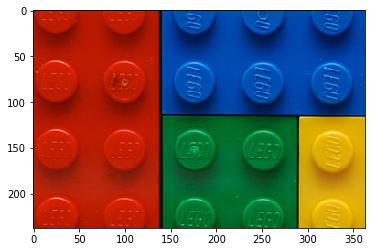

In [3]:
plt.imshow(img)

In [4]:
pixels = np.float32(img.reshape(-1, 3))

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)
palette = palette/255
dominant = palette[np.argmax(counts)]

In [5]:
labels

array([[0],
       [0],
       [0],
       ...,
       [4],
       [4],
       [4]], dtype=int32)

In [6]:
palette

array([[0.703529  , 0.10722072, 0.00899781],
       [0.00713527, 0.2840343 , 0.6648153 ],
       [0.0105161 , 0.11535564, 0.30323353],
       [0.00855047, 0.41762504, 0.17850623],
       [0.8511836 , 0.6545403 , 0.04038044]], dtype=float32)

In [7]:
palette.shape

(5, 3)

In [8]:
counts

array([32920, 21390,  5355, 17891,  8838])

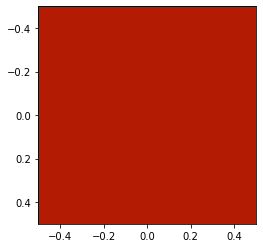

In [9]:
plt.imshow([[dominant]])

[0.703529   0.10722072 0.00899781]


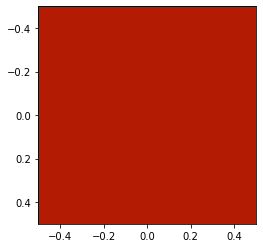

[0.00713527 0.2840343  0.6648153 ]


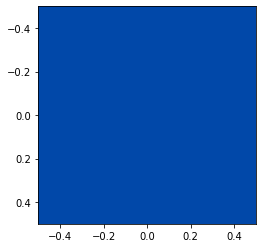

[0.0105161  0.11535564 0.30323353]


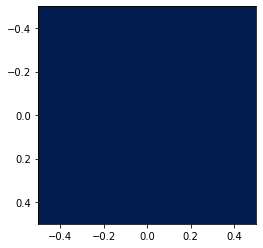

[0.00855047 0.41762504 0.17850623]


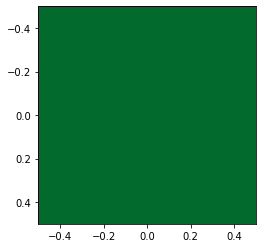

[0.8511836  0.6545403  0.04038044]


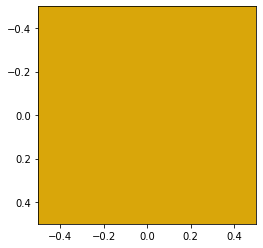

In [10]:
for color in palette:
    print(color)
    plt.imshow([[color]])
    plt.show()

In [11]:
def getDominantColor(img):
    pixels = np.float32(img.reshape(-1, 3))

    n_colors = 5
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, 0.1)
    flags = cv2.KMEANS_RANDOM_CENTERS

    _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
    _, counts = np.unique(labels, return_counts=True)
    palette = palette/255
    dominant = palette[np.argmax(counts)]
    print("palette : {}".format(palette))
    print("dominant : {}".format(dominant))
    return palette, dominant

In [12]:
cv2.TERM_CRITERIA_EPS

2

In [13]:
cv2.TERM_CRITERIA_MAX_ITER

1

In [14]:
def showPaletteColors(palette):
    for color in palette:
        print(color)
        plt.imshow([[color]])
        plt.show()

In [15]:
palette, dominant = getDominantColor(img)

palette : [[0.8511836  0.6545403  0.04038044]
 [0.01066195 0.11493071 0.30152515]
 [0.703529   0.10722072 0.00899781]
 [0.00712492 0.28384045 0.6644833 ]
 [0.00852659 0.4176985  0.17854156]]
dominant : [0.703529   0.10722072 0.00899781]


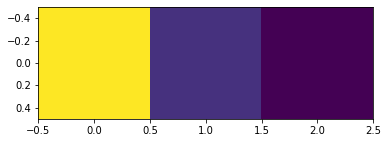

In [16]:
plt.imshow([dominant])

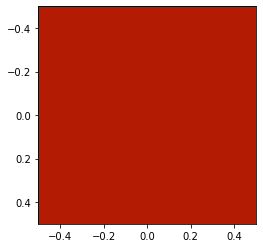

In [17]:
plt.imshow([[dominant]])

(30, 10, 3)


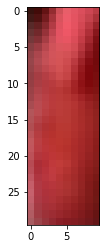

In [18]:
image_path = 'testImage/test1.png'
img = io.imread(image_path)[120:150, 10:20, :-1]
print(img.shape)
plt.imshow(img)

In [19]:
palette, dominant = getDominantColor(img)

palette : [[0.8319826  0.32252723 0.35834423]
 [0.67607844 0.27267975 0.29734206]
 [0.58217996 0.13852364 0.14354093]
 [0.7053493  0.20810966 0.21317342]
 [0.44012067 0.08476622 0.08597285]]
dominant : [0.7053493  0.20810966 0.21317342]


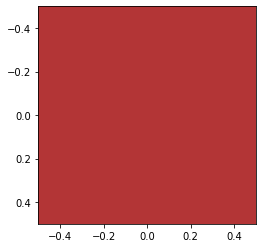

In [20]:
plt.imshow([[dominant]])

In [21]:
def plotColorHistogram(img):
    color = ('b','g','r')
    for channel,col in enumerate(color):
        histr = cv2.calcHist([img],[channel],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.title('Histogram for color scale picture')
    plt.show()

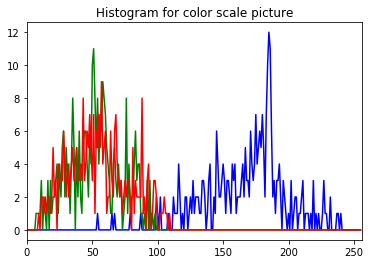

In [22]:
plotColorHistogram(img)

In [23]:
palette, dominant = getDominantColor(img)

palette : [[0.6967579  0.20190255 0.20570762]
 [0.43442267 0.0828976  0.08431373]
 [0.57210624 0.13168879 0.13548386]
 [0.6827229  0.2620052  0.28605253]
 [0.825      0.32328433 0.35841504]]
dominant : [0.6967579  0.20190255 0.20570762]


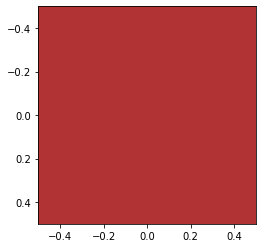

In [24]:
plt.imshow([[dominant]])

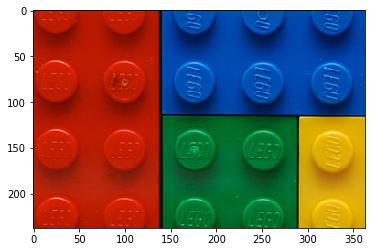

In [25]:
image_path = 'https://i.stack.imgur.com/DNM65.png'
img = io.imread(image_path)[:, :, :-1]
plt.imshow(img)

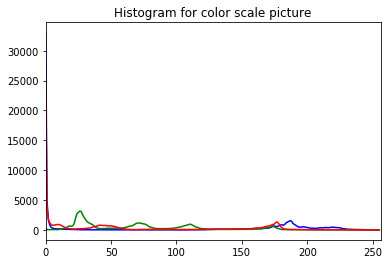

In [26]:
plotColorHistogram(img)

In [27]:
palette, dominant = getDominantColor(img)

palette : [[0.00855073 0.4176374  0.17851226]
 [0.8511836  0.6545403  0.04038044]
 [0.0105188  0.11534569 0.3031195 ]
 [0.703529   0.10722072 0.00899781]
 [0.00713461 0.28402483 0.6647992 ]]
dominant : [0.703529   0.10722072 0.00899781]


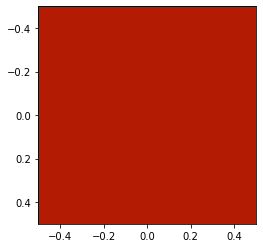

In [28]:
plt.imshow([[dominant]])

[0.00855073 0.4176374  0.17851226]


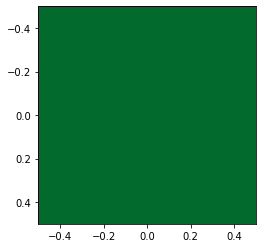

[0.8511836  0.6545403  0.04038044]


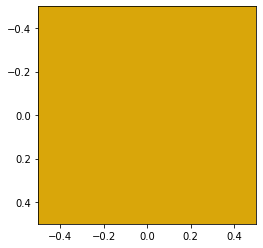

[0.0105188  0.11534569 0.3031195 ]


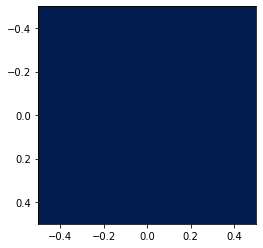

[0.703529   0.10722072 0.00899781]


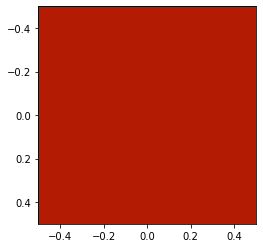

[0.00713461 0.28402483 0.6647992 ]


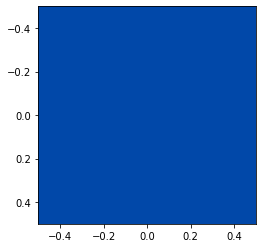

In [29]:
showPaletteColors(palette)